<a href="https://colab.research.google.com/github/asegura4488/CienciaDatos/blob/main/Semana5/MinimosCuadrados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
from google.colab import drive
from google.colab import files
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [6]:
import seaborn as sns
import os
os.chdir('/content/drive/MyDrive/ColabNotebooks/Cursos/CursoCienciaDatos/Semana5')
!ls

Datos  MinimosCuadrados.ipynb  VentasDiasPredictor.ipynb


In [23]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [76]:
data = pd.read_csv('Datos/DatosRegresion.csv')
data

,X0,X1,Y
0,5.488135,6.207617,25.523276
1,7.151894,7.460697,32.167177
2,6.027634,10.499409,43.066154
3,5.448832,15.011900,38.069097
4,4.236548,6.670149,21.101511
...,...,...,...
495,2.716528,1.953527,5.693810
496,4.554441,10.298444,28.084859
497,4.017135,18.768240,51.312559
498,2.484135,4.572931,18.596668


In [77]:
#data['X0X1'] = data['X0']+data['X1']
#data

In [79]:
X = np.array(data[['X0','X1']])
Y = np.array(data['Y'])

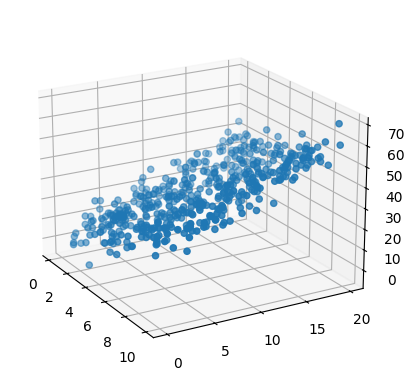

In [81]:
fig = plt.figure()
ax = fig.add_subplot(111,projection='3d', elev=20, azim=-30)
ax.scatter(X[:,0], X[:,1], Y)
plt.show()

In [82]:
XTrain, XTest, YTrain, YTest = train_test_split(X, Y, test_size=0.2, random_state=42)

In [83]:
XTrain.shape

(400, 2)

In [84]:
# Modelo
Model = LinearRegression()
Model.fit(XTrain, YTrain)

LinearRegression()

In [85]:
Model.intercept_

np.float64(3.770760603399548)

In [86]:
Model.coef_[0]

np.float64(2.4738169495486084)

In [87]:
Model.coef_[1]

np.float64(1.4807416623384977)

In [88]:
params = np.array([Model.intercept_, Model.coef_[0], Model.coef_[1]])
params

array([3.7707606 , 2.47381695, 1.48074166])

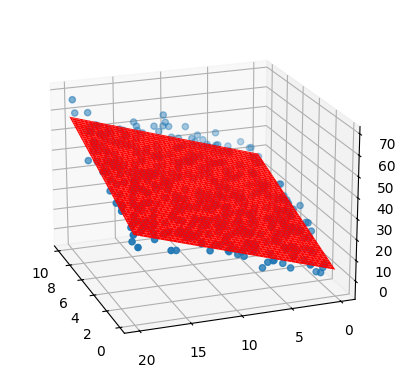

In [90]:
# Vamos a pintar el modelo
x0 = np.linspace(min(X[:,0]), max(X[:,0]), 100)
x1 = np.linspace(min(X[:,1]), max(X[:,1]), 100)
xx0, xx1 = np.meshgrid(x0, x1)

Ygrid = params[0] + params[1]*xx0 + params[2]*xx1

fig = plt.figure()
ax = fig.add_subplot(111,projection='3d', elev=20, azim=160)
ax.scatter(X[:,0], X[:,1], Y)
ax.plot_surface(xx0, xx1, Ygrid,color='r')
plt.show()

In [91]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [92]:
mean_absolute_error(YTest, Model.predict(XTest))

3.9662708992995794

In [93]:
mean_squared_error(YTest, Model.predict(XTest))

25.12949710404716